# Online Lab Assignment
by Quek Lin Hui U1921918F

## Problem 1: Exploratory Analysis

In [345]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [346]:
#Read the csv file
notesdata = pd.read_csv(r'C:\Users\theco\Downloads\quizData.csv')
notesdata.head()

,Variance,Skewness,Kurtosis,Entropy,Banknote
0,3.62160,8.6661,-2.8073,-0.44699,Genuine
1,4.54590,8.1674,-2.4586,-1.46210,Genuine
2,3.86600,-2.6383,1.9242,0.10645,Genuine
3,3.45660,9.5228,-4.0112,-3.59440,Genuine
4,0.32924,-4.4552,4.5718,-0.98880,Genuine


In [347]:
notesNumdata = pd.DataFrame(notesdata[['Variance','Skewness','Kurtosis','Entropy']])
notesNumdata.head()

,Variance,Skewness,Kurtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


### 1a) Print the statistical description of the predictor variables in the data and plot standard statistical distributions for each of the predictor variables. The predictors Variance, Skewness, Kurtosis, Entropy are all “numeric”.

In [348]:
# Print the statistical description of the predictor variables
notesNumdata.describe()

,Variance,Skewness,Kurtosis,Entropy
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.170628,1.724250,1.452808,-1.224837
std,2.820315,5.938027,4.462049,2.108555
min,-7.042100,-13.773100,-5.261300,-8.548200
25%,-1.941250,-1.916200,-1.674350,-2.532775
50%,0.119660,2.140700,0.561365,-0.620265
75%,2.460275,6.573575,3.444400,0.376710
max,6.563300,12.951600,17.927400,2.449500


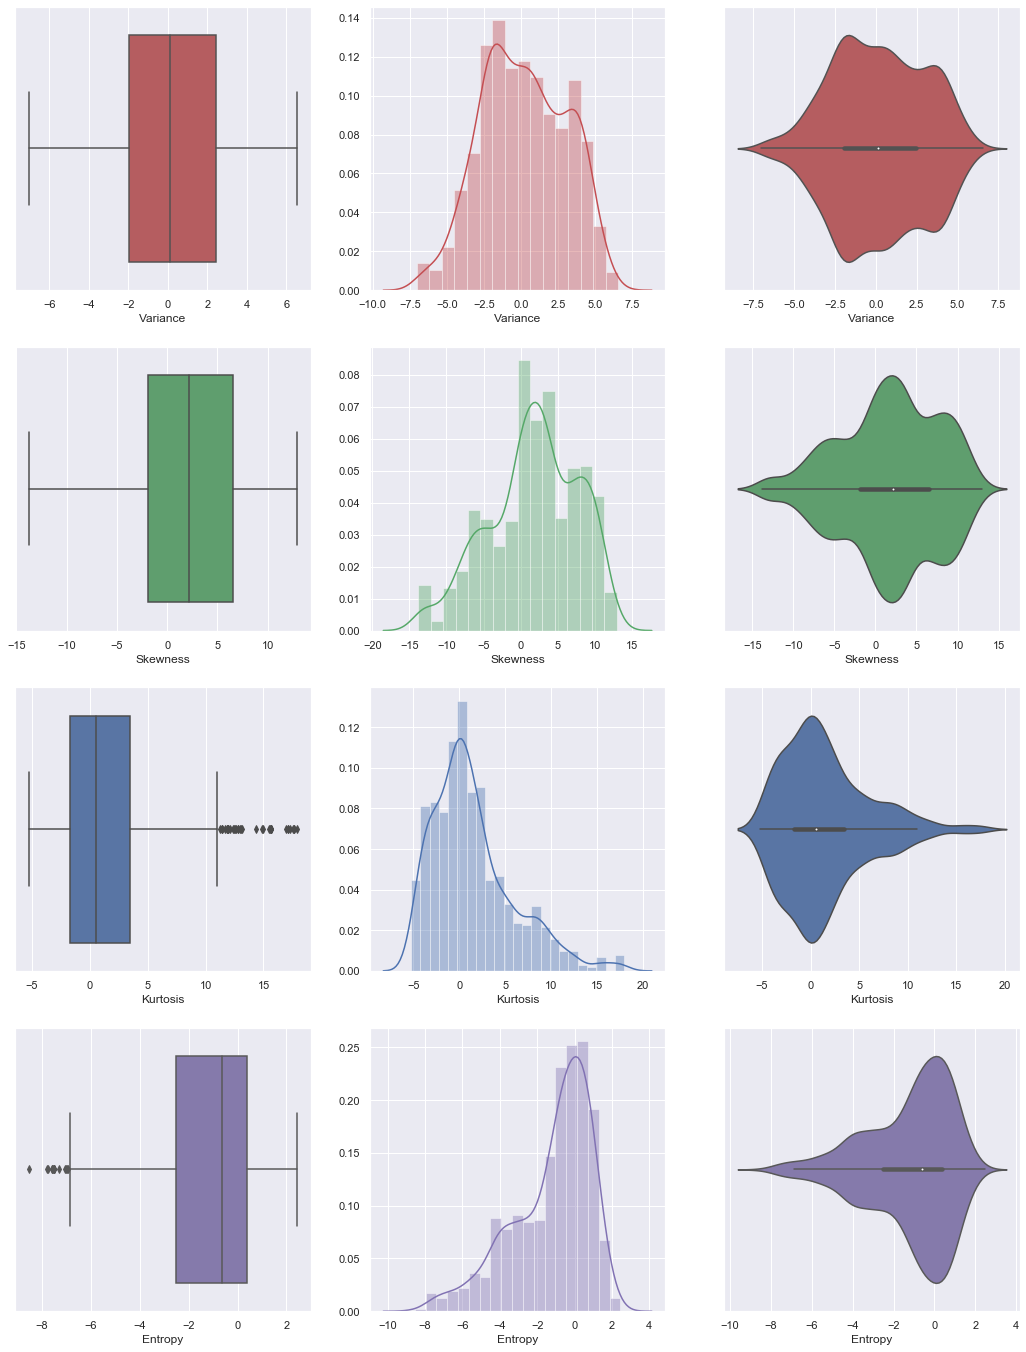

In [349]:
# Draw the statistical distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m"]

count = 0
for var in notesNumdata:
    sb.boxplot(notesNumdata[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(notesNumdata[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(notesNumdata[var], color = colors[count], ax = axes[count,2])
    count += 1

### 1b) Comment : Which numeric variable has the most number of outliers? Exactly how many outliers does this variable have, if we consider the points outside the range [Q1 – 1.5 * (Q3 – Q1), Q3 + 1.5 * (Q3 – Q1)] to be the outliers?

In [350]:
notesNumdata = notesNumdata.astype(float)
Q1 = notesNumdata.quantile(0.25)
Q3 = notesNumdata.quantile(0.75)
IQR = Q3 - Q1
((notesNumdata < (Q1 - 1.5 * IQR)) | (notesNumdata > (Q3 + 1.5 * IQR))).sum()

Variance     0
Skewness     0
Kurtosis    37
Entropy     16
dtype: int64

Kurtosis has the most number of outliers. It has 37 outliers.

### 1c) Print the statistical description and plot standard statistical distributions for the response variable – Banknote.

In [351]:
BankNotedata = pd.DataFrame(notesdata['Banknote'])
BankNotedata.head()

,Banknote
0,Genuine
1,Genuine
2,Genuine
3,Genuine
4,Genuine


In [352]:
BankNotedata.describe()

,Banknote
count,1000
unique,2
top,Forged
freq,500


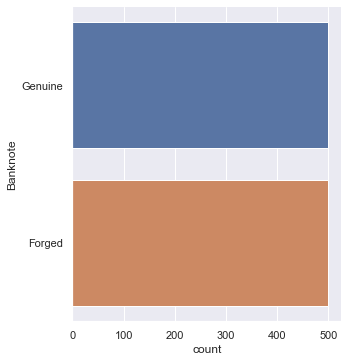

In [353]:
sb.catplot(y = 'Banknote', data = BankNotedata, kind = "count")

### 1d) Write a small piece of code to print the exact ratio (“Genuine” : “Forged”) in the response variable Banknote.

In [354]:
Banknumdata = BankNotedata['Banknote']
g = 0
f = 0
for i in range(len(Banknumdata)):
    if (Banknumdata[i]=="Genuine"):
        g = g +1
    elif (Banknumdata[i]=="Forged"):
        f = f + 1
print("The exact ratio is", g,":",f,".")

The exact ratio is 500 : 500 .


### 1e) Visualize the relationship of response variable Banknote with the numeric predictor variables using swarmplots.

In [355]:
allNumdata = pd.DataFrame(notesdata[['Variance','Skewness','Kurtosis','Entropy','Banknote']])

#### Swarmplot for Variance:

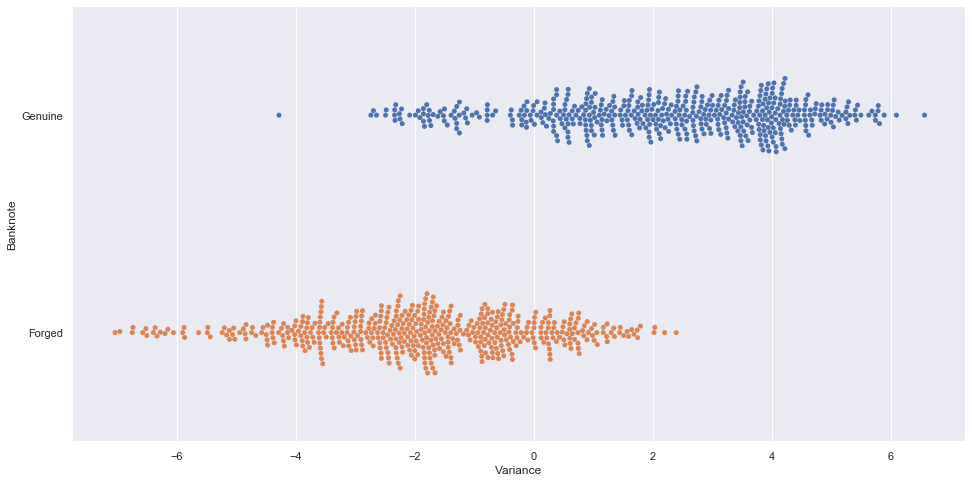

In [356]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.swarmplot(x = 'Variance', y = 'Banknote', data = allNumdata)

#### Swarmplot for Skewness:

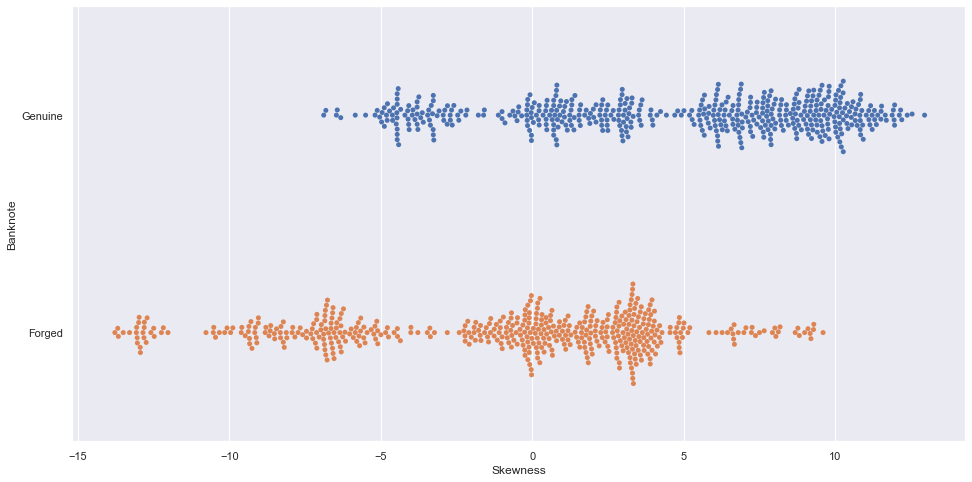

In [357]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.swarmplot(x = 'Skewness', y = 'Banknote', data = allNumdata)

#### Swarmplot for Kurtosis:

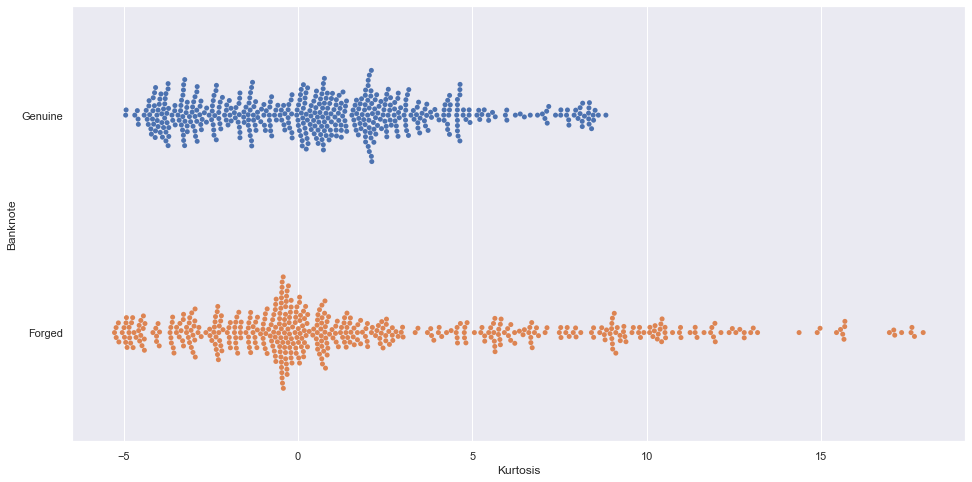

In [358]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.swarmplot(x = 'Kurtosis', y = 'Banknote', data = allNumdata)

#### Swarmplot for Entropy:

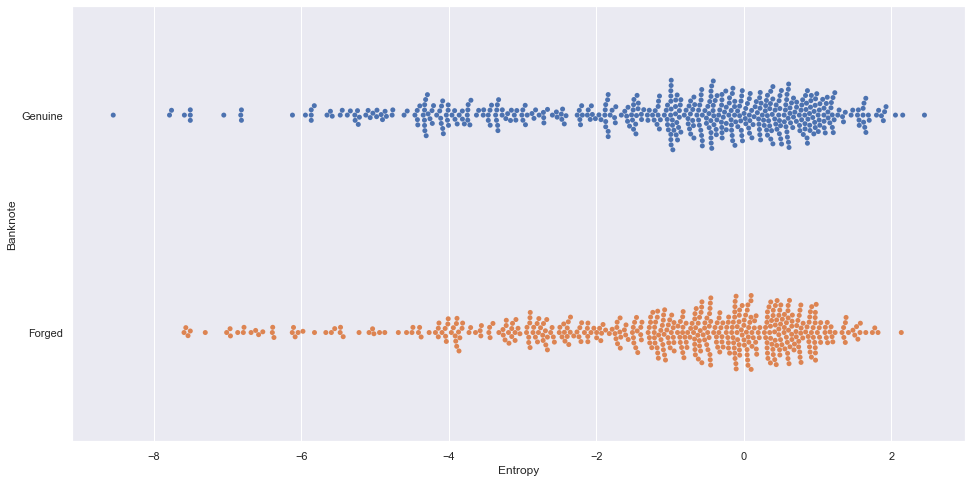

In [359]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.swarmplot(x = 'Entropy', y = 'Banknote', data = allNumdata)

# Problem 2 : Uni-Variate Decision Tree (remember to add the yaxis)

### 2a) Partition the data randomly into Train and Test sets; 80% for Train and 20% for Test. On the Train set, fit four uni-variate Decision Tree models for Banknote against each of the four numeric predictor variables – Variance, Skewness, Kurtosis, Entropy. In each case, do not fit a decision tree more than depth 4 (may overfit otherwise).

#### Univariate Decision Tree for Variance

Train Set : (800, 1) (800, 1)
Test Set  : (200, 1) (200, 1)


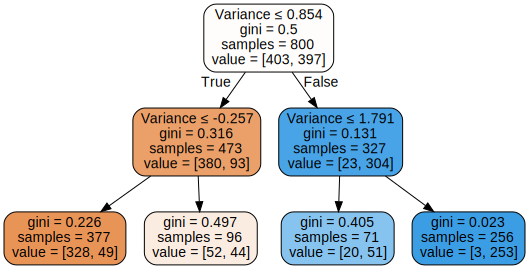

In [360]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
var_y = pd.DataFrame(notesdata['Banknote'])
var_x = pd.DataFrame(notesdata['Variance'])


#Partitioning the data randomly into 80% train and 20% test
var_x_train, var_x_test, var_y_train, var_y_test = train_test_split(var_x, var_y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", var_x_train.shape, var_y_train.shape)
print("Test Set  :", var_x_test.shape, var_y_test.shape)
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
var_dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
var_dectree.fit(var_x_train, var_y_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
var_treedot = export_graphviz(var_dectree,                                      # the model
                          feature_names = var_x_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(var_treedot)

#### Below is the univariate decision tree for skewness

Train Set : (800, 1) (800, 1)
Test Set  : (200, 1) (200, 1)


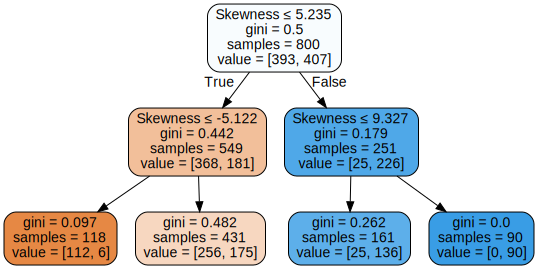

In [361]:
# Extract Response and Predictors
skew_y = pd.DataFrame(notesdata['Banknote'])
skew_x = pd.DataFrame(notesdata['Skewness'])

skew_x_train, skew_x_test, skew_y_train, skew_y_test = train_test_split(skew_x, skew_y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", skew_x_train.shape, skew_y_train.shape)
print("Test Set  :", skew_x_test.shape, skew_y_test.shape)
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
skew_dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
skew_dectree.fit(skew_x_train, skew_y_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
skew_treedot = export_graphviz(skew_dectree,                                      # the model
                          feature_names = skew_x_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(skew_treedot)

#### Below is the univariate decision tree for Kurtosis

Train Set : (800, 1) (800, 1)
Test Set  : (200, 1) (200, 1)


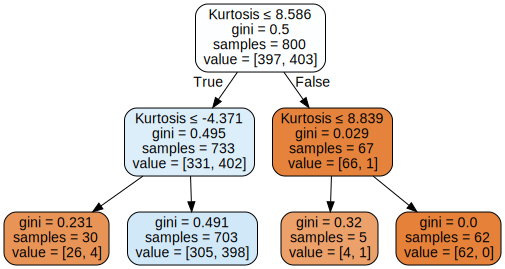

In [362]:
# Extract Response and Predictors
kur_y = pd.DataFrame(notesdata['Banknote'])
kur_x = pd.DataFrame(notesdata['Kurtosis'])

kur_x_train, kur_x_test, kur_y_train, kur_y_test = train_test_split(kur_x, kur_y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", kur_x_train.shape, kur_y_train.shape)
print("Test Set  :", kur_x_test.shape, kur_y_test.shape)

# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
kur_dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
kur_dectree.fit(kur_x_train, kur_y_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
kur_treedot = export_graphviz(kur_dectree,                                      # the model
                          feature_names = kur_x_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(kur_treedot)

#### Below is the univariate decision tree for Entropy

Train Set : (800, 1) (800, 1)
Test Set  : (200, 1) (200, 1)


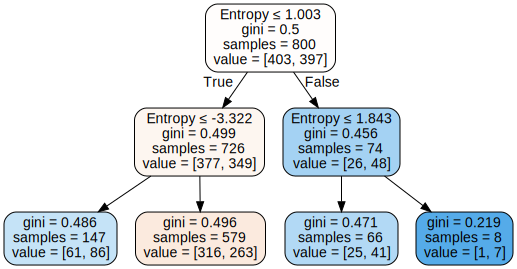

In [363]:
# Extract Response and Predictors
entro_y = pd.DataFrame(notesdata['Banknote'])
entro_x = pd.DataFrame(notesdata['Entropy'])

entro_x_train, entro_x_test, entro_y_train, entro_y_test = train_test_split(entro_x, entro_y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", entro_x_train.shape, entro_y_train.shape)
print("Test Set  :", entro_x_test.shape, entro_y_test.shape)
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
entro_dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
entro_dectree.fit(entro_x_train, entro_y_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
entro_treedot = export_graphviz(entro_dectree,                                      # the model
                          feature_names = entro_x_train.columns,        # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(entro_treedot)

### 2b) Predict Banknote using each of the four models on both Train and Test data. Show the Confusion Matrix for each model, both for Train and Test datasets. Print the Classification Accuracy for the tree models, on both datasets.

#### Confusion Matrix for Variance

(2.0, 0.0)

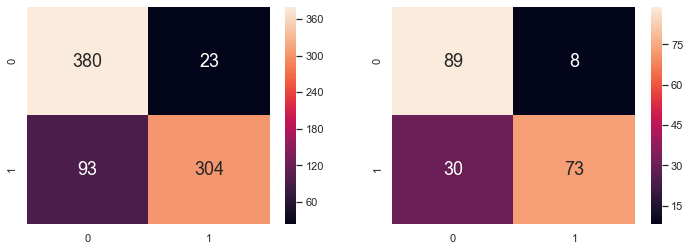

In [364]:
# Predict values according to Variance
var_y_train_pred = var_dectree.predict(var_x_train)
var_y_test_pred = var_dectree.predict(var_x_test)

# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(var_y_train, var_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bx = sb.heatmap(confusion_matrix(var_y_test, var_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
bottom, top = bx.get_ylim()
bx.set_ylim(bottom + 0.5, top - 0.5)

#### Confusion Matrix for Skewness

(2.0, 0.0)

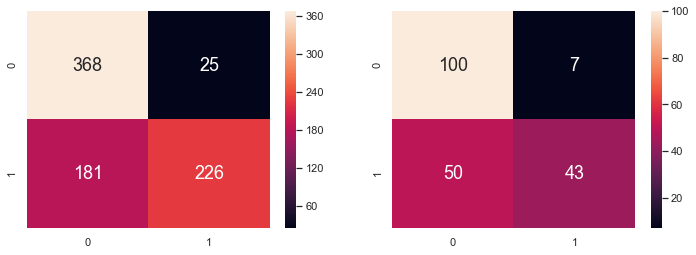

In [365]:
# Predict values according to Skewness
skew_y_train_pred = skew_dectree.predict(skew_x_train)
skew_y_test_pred = skew_dectree.predict(skew_x_test)

# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(skew_y_train, skew_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bx = sb.heatmap(confusion_matrix(skew_y_test, skew_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
bottom, top = bx.get_ylim()
bx.set_ylim(bottom + 0.5, top - 0.5)

#### Confusion Matrix for Kurtosis

(2.0, 0.0)

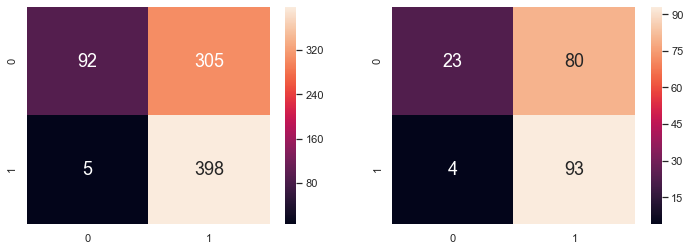

In [366]:
# Predict values according to Kurtosis
kur_y_train_pred = kur_dectree.predict(kur_x_train)
kur_y_test_pred = kur_dectree.predict(kur_x_test)

# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(kur_y_train, kur_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bx = sb.heatmap(confusion_matrix(kur_y_test, kur_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
bottom, top = bx.get_ylim()
bx.set_ylim(bottom + 0.5, top - 0.5)

#### Confusion Matrix for Entropy

(2.0, 0.0)

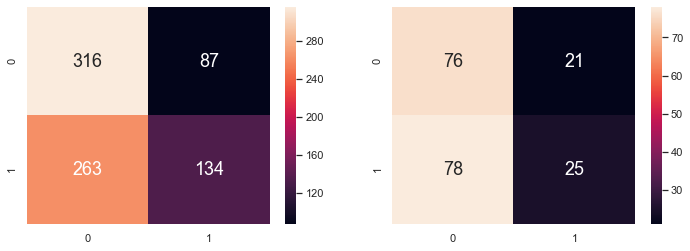

In [367]:
# Predict values according to Entropy
entro_y_train_pred = entro_dectree.predict(entro_x_train)
entro_y_test_pred = entro_dectree.predict(entro_x_test)

# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(entro_y_train, entro_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bx = sb.heatmap(confusion_matrix(entro_y_test, entro_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
bottom, top = bx.get_ylim()
bx.set_ylim(bottom + 0.5, top - 0.5)

In [368]:
# Print the Classification Accuracy for the train datasets
print("These are the Classification Accuracies for the train datasets:")
print("Variance Classification Accuracy \t:", var_dectree.score(var_x_train, var_y_train))
print("Skewness Classification Accuracy \t:", skew_dectree.score(skew_x_train, skew_y_train))
print("Kurtosis Classification Accuracy \t:", kur_dectree.score(kur_x_train, kur_y_train))
print("Entropy Classification Accuracy \t:", entro_dectree.score(entro_x_train, entro_y_train))

These are the Classification Accuracies for the train datasets:
Variance Classification Accuracy 	: 0.855
Skewness Classification Accuracy 	: 0.7425
Kurtosis Classification Accuracy 	: 0.6125
Entropy Classification Accuracy 	: 0.5625


In [369]:
# Print the Classification Accuracy for the test datasets
print("These are the Classification Accuracies for the test datasets:")
print("Variance Classification Accuracy \t:", var_dectree.score(var_x_test, var_y_test))
print("Skewness Classification Accuracy \t:", skew_dectree.score(skew_x_test, skew_y_test))
print("Kurtosis Classification Accuracy \t:", kur_dectree.score(kur_x_test, kur_y_test))
print("Entropy Classification Accuracy \t:", entro_dectree.score(entro_x_test, entro_y_test))

These are the Classification Accuracies for the test datasets:
Variance Classification Accuracy 	: 0.81
Skewness Classification Accuracy 	: 0.715
Kurtosis Classification Accuracy 	: 0.58
Entropy Classification Accuracy 	: 0.505


### 2c) Comment : Which of the four uni-variate Decision Trees is the best in terms of predicting Banknote? Justify.

Variance is best in predicting Banknote as its classification accuracy is the highest for both the train and test datasets and therefore predicting using variance is most likely to give a correct result compared to the rest.

# Problem 3 : Multi-Variate Decision Tree

### 3a) Partition the data randomly into Train and Test sets; 80% for Train and 20% for Test (you may use the same partition as before, if you want). On the Train set, fit a single multi-variate Decision Tree model (max depth 4) for Banknote against all of the four other numeric predictor variables – Variance, Skewness, Kurtosis, Entropy.

Train Set : (800, 4) (800, 1)
Test Set  : (200, 4) (200, 1)


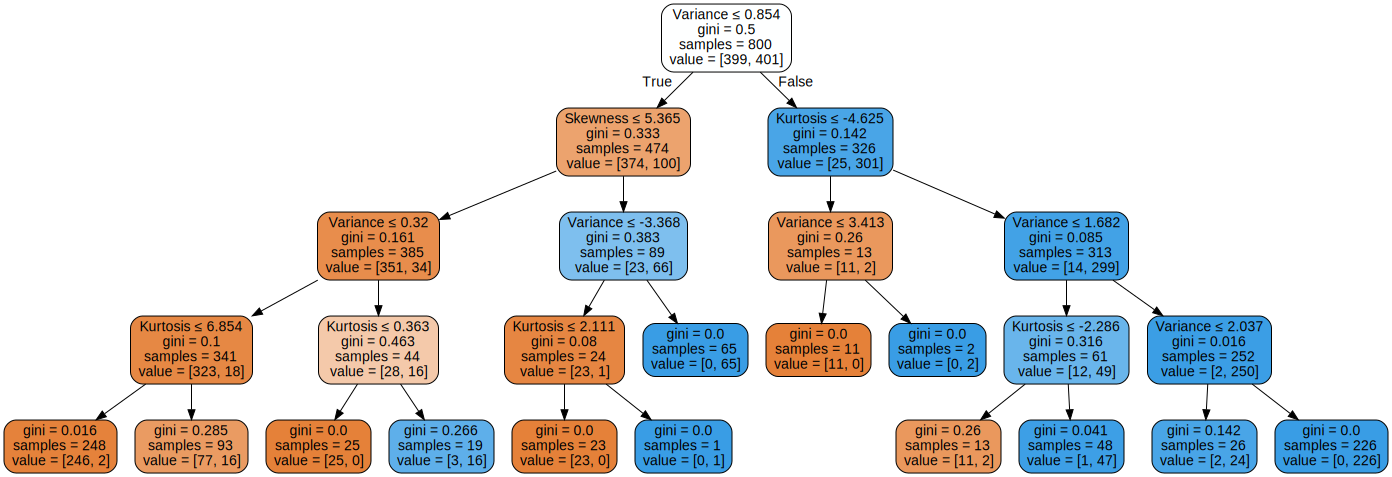

In [370]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(notesdata['Banknote'])
x = pd.DataFrame(notesdata[['Variance','Skewness','Kurtosis','Entropy']])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = x_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

### 3b) Predict Banknote using the tree model you fit on both Train and Test data. Show the Confusion Matrix on both Train and Test datasets. Print the Classification Accuracy for the tree model on both Train and Test datasets.

(2.0, 0.0)

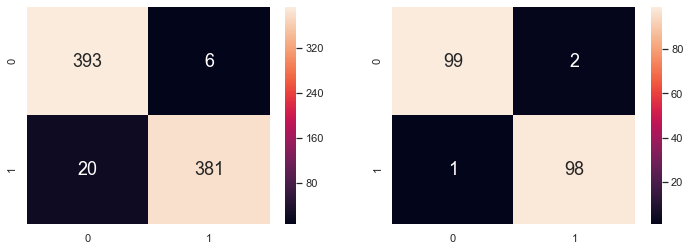

In [371]:
# Predict values
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bx = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
bottom, top = bx.get_ylim()
bx.set_ylim(bottom + 0.5, top - 0.5)

In [372]:
#Print the classification accuracies
print("Classification Accuracy for train set \t:", dectree.score(x_train, y_train))
print("Classification Accuracy for test set \t:", dectree.score(x_test, y_test))

Classification Accuracy for train set 	: 0.9675
Classification Accuracy for test set 	: 0.985


### 3c) Write a small piece of code to print the exact FPR and FNR values calculated from each of the confusion matrices. You may consider “Genuine” as Positive and “Forged” as Negative in this context and calculate accordingly.

In [373]:
# Define Train matrix
train_matrix = confusion_matrix(y_train, y_train_pred)

# Train data
train_TN = train_matrix[0][0]
train_FN = train_matrix[1][0]
train_TP = train_matrix[1][1]
train_FP = train_matrix[0][1]

# False Positive Rate for Train Data
train_FPR = train_FP/(train_FP+train_TN)
# False Negative Rate for Train Data
train_FNR = train_FN/(train_TP+train_FN)

print("FPR and FNR values for Train Set: ")
print("False Positive Rate for Train Set: ",train_FPR)
print("False Negative Rate for Train Set: ",train_FNR)

FPR and FNR values for Train Set: 
False Positive Rate for Train Set:  0.015037593984962405
False Negative Rate for Train Set:  0.04987531172069826


In [374]:
#Define Test Matrix
test_matrix = confusion_matrix(y_test, y_test_pred)

# Test data
test_TN = test_matrix[0][0]
test_FN = test_matrix[1][0]
test_TP = test_matrix[1][1]
test_FP = test_matrix[0][1]

# False Positive Rate for Test data
test_FPR = test_FP/(test_FP+test_TN)
# False Negative Rate for Test data
test_FNR = test_FN/(test_TP+test_FN)

print("FPR and FNR values for Test Set: ")
print("False Positive Rate for Test Set: ",test_FPR)
print("False Negative Rate for Test Set: ",test_FNR)

FPR and FNR values for Test Set: 
False Positive Rate for Test Set:  0.019801980198019802
False Negative Rate for Test Set:  0.010101010101010102


### 3d) Print ONLY the False Positive cases (complete rows from the dataframe) in each of the Train and Test datasets. Print ONLY the False Negative cases (complete rows from the dataframe) in each of the Train and Test datasets.

In [375]:
# False Positive Cases (Train)
ypredictor_train = pd.DataFrame(y_train_pred, columns = ["Predicted Banknote"], index = y_train.index)
dataaccuracytrain = pd.concat([x_train ,y_train, ypredictor_train], axis = 1)
falseres_train = pd.DataFrame(dataaccuracytrain.loc[dataaccuracytrain['Banknote'] != dataaccuracytrain['Predicted Banknote']])
falseres_train.loc[falseres_train['Predicted Banknote'] != 'Forged']

,Variance,Skewness,Kurtosis,Entropy,Banknote,Predicted Banknote
648,0.55298,-3.46190,1.70480,1.100800,Forged,Genuine
831,0.74428,-3.77230,1.61310,1.575400,Forged,Genuine
832,2.01770,1.79820,-2.95810,0.209900,Forged,Genuine
813,0.37637,-0.82358,0.78543,0.745240,Forged,Genuine
838,1.43780,0.66837,-2.02670,1.027100,Forged,Genuine
649,2.03100,1.85200,-3.01210,0.003003,Forged,Genuine


In [376]:
# False Negative Cases (Train)
falseres_train.loc[falseres_train['Predicted Banknote'] != 'Genuine']

,Variance,Skewness,Kurtosis,Entropy,Banknote,Predicted Banknote
178,-0.131440,-1.777500,8.3316,0.352140,Genuine,Forged
90,1.480600,7.637700,-2.7876,-1.034100,Genuine,Forged
123,-1.507500,1.922400,7.1466,0.891360,Genuine,Forged
172,-1.695200,1.065700,8.8294,0.949550,Genuine,Forged
280,0.209770,-0.461460,7.7267,0.909460,Genuine,Forged
230,-1.338900,1.552000,7.0806,1.031000,Genuine,Forged
30,-0.248110,-0.177970,4.9068,0.154290,Genuine,Forged
322,-1.734400,2.017500,7.7618,0.935320,Genuine,Forged
374,-1.505500,0.070346,6.8681,-0.506480,Genuine,Forged
278,0.895660,7.776300,-2.7473,-1.935300,Genuine,Forged


In [377]:
# False Positive Case (Test)
ypredictor_test = pd.DataFrame(y_test_pred, columns = ["Predicted Banknote"], index = y_test.index)
dataaccuracytest = pd.concat([x_test ,y_test, ypredictor_test], axis = 1)
falseres_test = pd.DataFrame(dataaccuracytest.loc[dataaccuracytest['Banknote'] != dataaccuracytest['Predicted Banknote']])

falseres_test.loc[falseres_test['Predicted Banknote'] != 'Forged']

,Variance,Skewness,Kurtosis,Entropy,Banknote,Predicted Banknote
655,1.5631,0.89599,-1.9702,0.65472,Forged,Genuine
663,1.7425,3.68330,-4.0129,-1.72070,Forged,Genuine


In [378]:
# False Negative Cases (Test)
falseres_test.loc[falseres_test['Predicted Banknote'] != 'Genuine']

,Variance,Skewness,Kurtosis,Entropy,Banknote,Predicted Banknote
241,-1.3931,1.5664,7.5382,0.78403,Genuine,Forged


### 3e) Predict the category of bank note (Genuine/Forged) for the following data points using the tree model you fit.
{'Variance': -4.9447, 'Skewness': 3.3005, 'Kurtosis': 1.063, 'Entropy': -1.444}
{'Variance': 0.94225, 'Skewness': 5.8561, 'Kurtosis': 1.8762, 'Entropy': -0.32544}
{'Variance': 2.2429, 'Skewness': -4.1427, 'Kurtosis': 5.2333, 'Entropy': -0.40173}
{'Variance': 0.53936, 'Skewness': 3.8944, 'Kurtosis': -4.8166, 'Entropy': -4.3418}
{'Variance': -2.5724, 'Skewness': -0.95602, 'Kurtosis': 2.7073, 'Entropy': -0.16639}

In [379]:
# Creating a dictionary to store all the new values
predict_dict = {"Variance" : [-4.9447,0.94225,2.2429,0.53936,-2.5724],
                "Skewness" : [3.3005,5.8561,-4.1427,3.8944,-0.95602],
                "Kurtosis" : [1.063,1.8762,5.2333,-4.8166,2.7073],
                "Entrophy" : [-1.444,-0.32544,-0.40173,-4.3418,-0.16639]
                }

#Converting the dictionary into a pandas dataframe
predict_df = pd.DataFrame(predict_dict)
predict_df

,Variance,Skewness,Kurtosis,Entrophy
0,-4.94470,3.30050,1.0630,-1.44400
1,0.94225,5.85610,1.8762,-0.32544
2,2.24290,-4.14270,5.2333,-0.40173
3,0.53936,3.89440,-4.8166,-4.34180
4,-2.57240,-0.95602,2.7073,-0.16639


In [380]:
#Create list to present the values neatly
neat = ["{'Variance': -4.9447, 'Skewness': 3.3005, 'Kurtosis': 1.063, 'Entropy': -1.444}","{'Variance': 0.94225, 'Skewness': 5.8561, 'Kurtosis': 1.8762, 'Entropy': -0.32544} ","{'Variance': 2.2429, 'Skewness': -4.1427, 'Kurtosis': 5.2333, 'Entropy': -0.40173} ","{'Variance': 0.53936, 'Skewness': 3.8944, 'Kurtosis': -4.8166, 'Entropy': -4.3418} ","{'Variance': -2.5724, 'Skewness': -0.95602, 'Kurtosis': 2.7073, 'Entropy': -0.16639}"]

y_new_pred = dectree.predict(predict_df)
print("Predictions: ")
n = 0
for i in y_new_pred:
    print("For", neat[n],"the prediction is", i+".")
    n +=1

Predictions: 
For {'Variance': -4.9447, 'Skewness': 3.3005, 'Kurtosis': 1.063, 'Entropy': -1.444} the prediction is Forged.
For {'Variance': 0.94225, 'Skewness': 5.8561, 'Kurtosis': 1.8762, 'Entropy': -0.32544}  the prediction is Genuine.
For {'Variance': 2.2429, 'Skewness': -4.1427, 'Kurtosis': 5.2333, 'Entropy': -0.40173}  the prediction is Genuine.
For {'Variance': 0.53936, 'Skewness': 3.8944, 'Kurtosis': -4.8166, 'Entropy': -4.3418}  the prediction is Forged.
For {'Variance': -2.5724, 'Skewness': -0.95602, 'Kurtosis': 2.7073, 'Entropy': -0.16639} the prediction is Forged.


# References:
https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python
https://towardsdatascience.com/a-python-beginners-look-at-loc-part-1-cb1e1e565ec2
https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylim.html
https://stackoverflow.com/questions/30787901/how-to-get-a-value-from-a-pandas-dataframe-and-not-the-index-and-object-type